In [1]:
#Import Dependencies

import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
data = pd.read_csv('../input/power-consumption-of-house/power_consumption_of_house.txt', sep = ';', parse_dates = True, low_memory = False)

data['date_time'] = data['Date'].str.cat(data['Time'], sep= ' ')
data.drop(['Date', 'Time'], inplace= True, axis = 1)

data.set_index(['date_time'], inplace=True)
data.replace('?', nan, inplace=True)
data = data.astype('float')
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
#First check how many values are null
np.isnan(data).sum()

#fill the null value

def fill_missing(data):
    one_day = 24*60
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row, col]):
                data[row, col] = data[row-one_day, col]

fill_missing(data.values)

#Again check the data after filling the value
np.isnan(data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [4]:
data.describe()
data.shape

(2075259, 7)

In [5]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
# Converting the index as date
data.index = pd.to_datetime(data.index)

In [7]:
data = data.resample('D').sum()

In [8]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


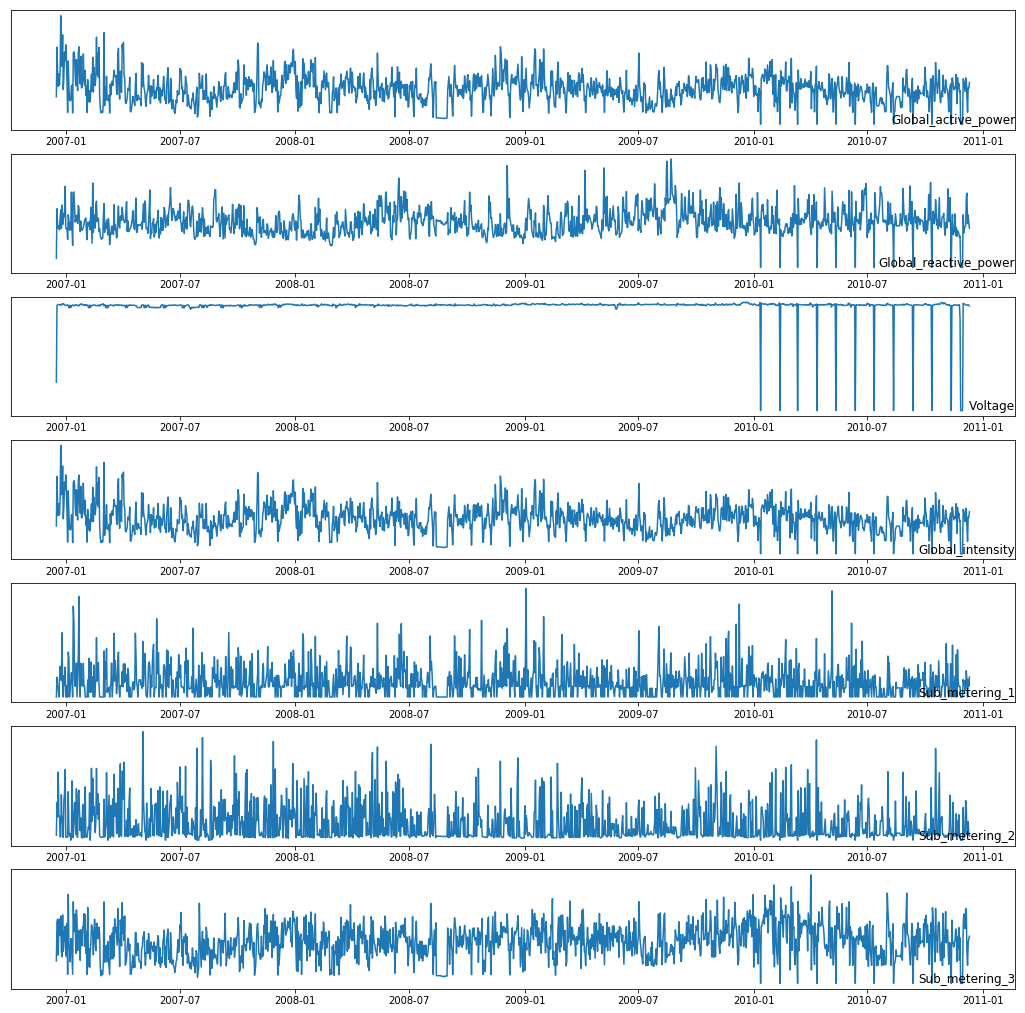

In [9]:

fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

# Exploring Active power consumption for each year

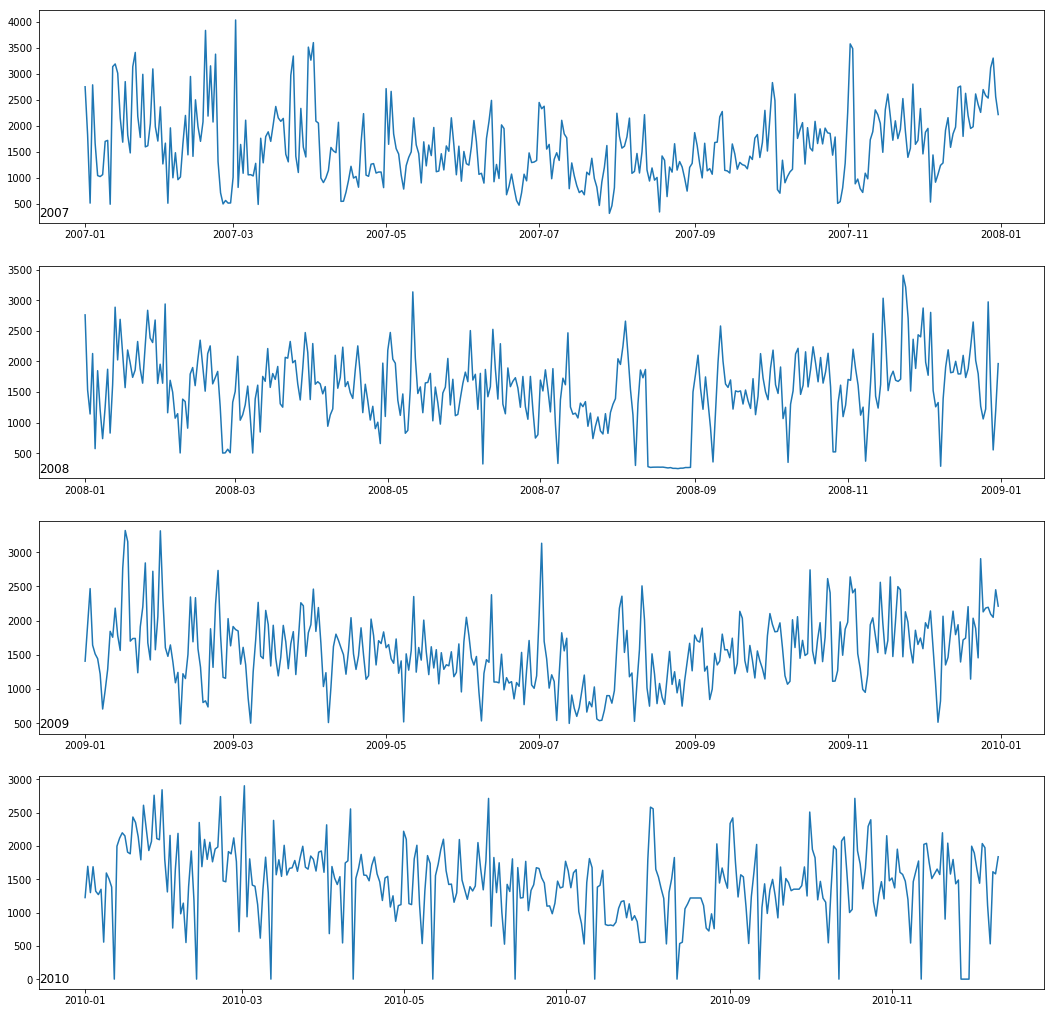

In [10]:
years = ['2007', '2008', '2009', '2010']

fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data['Global_active_power'])
    plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

# Power consumption distribution with histogram

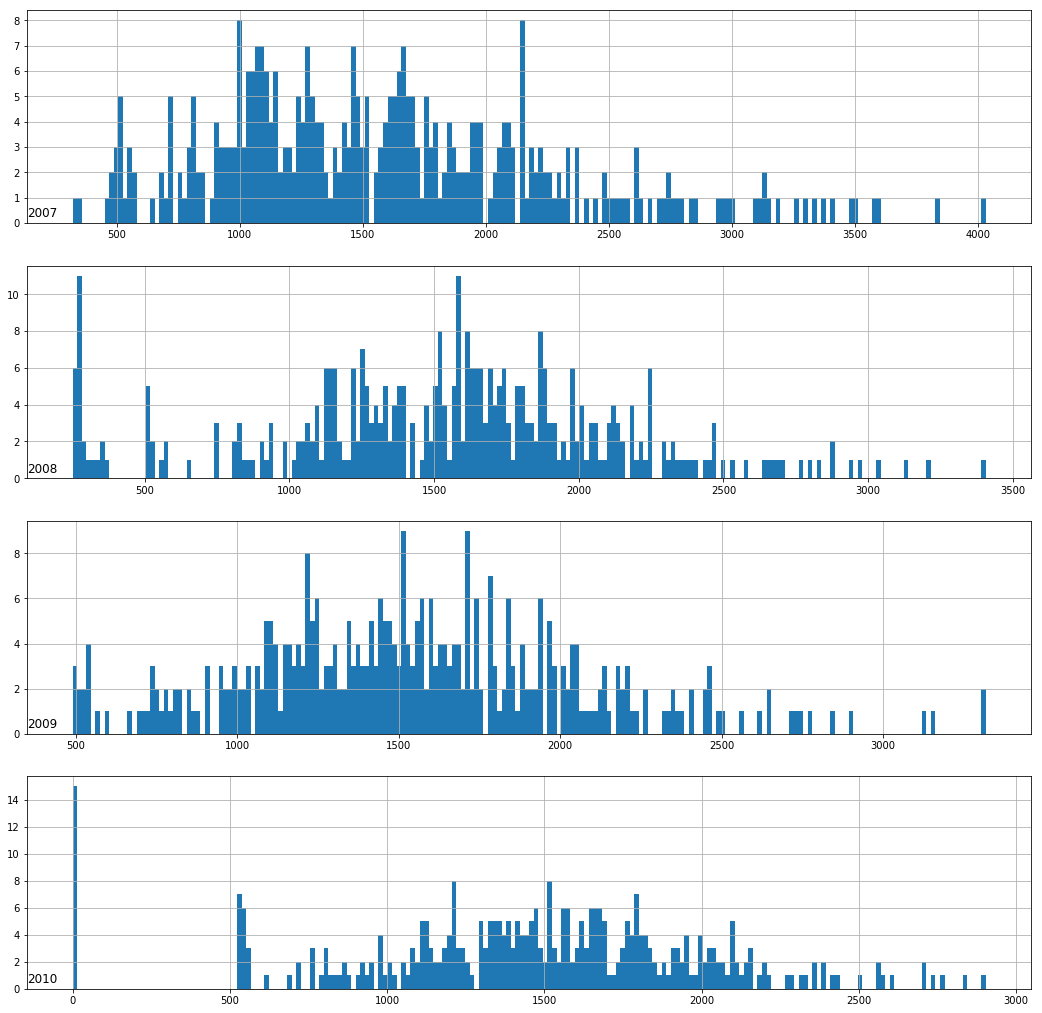

In [11]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    active_power_data['Global_active_power'].hist(bins = 200)
    plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

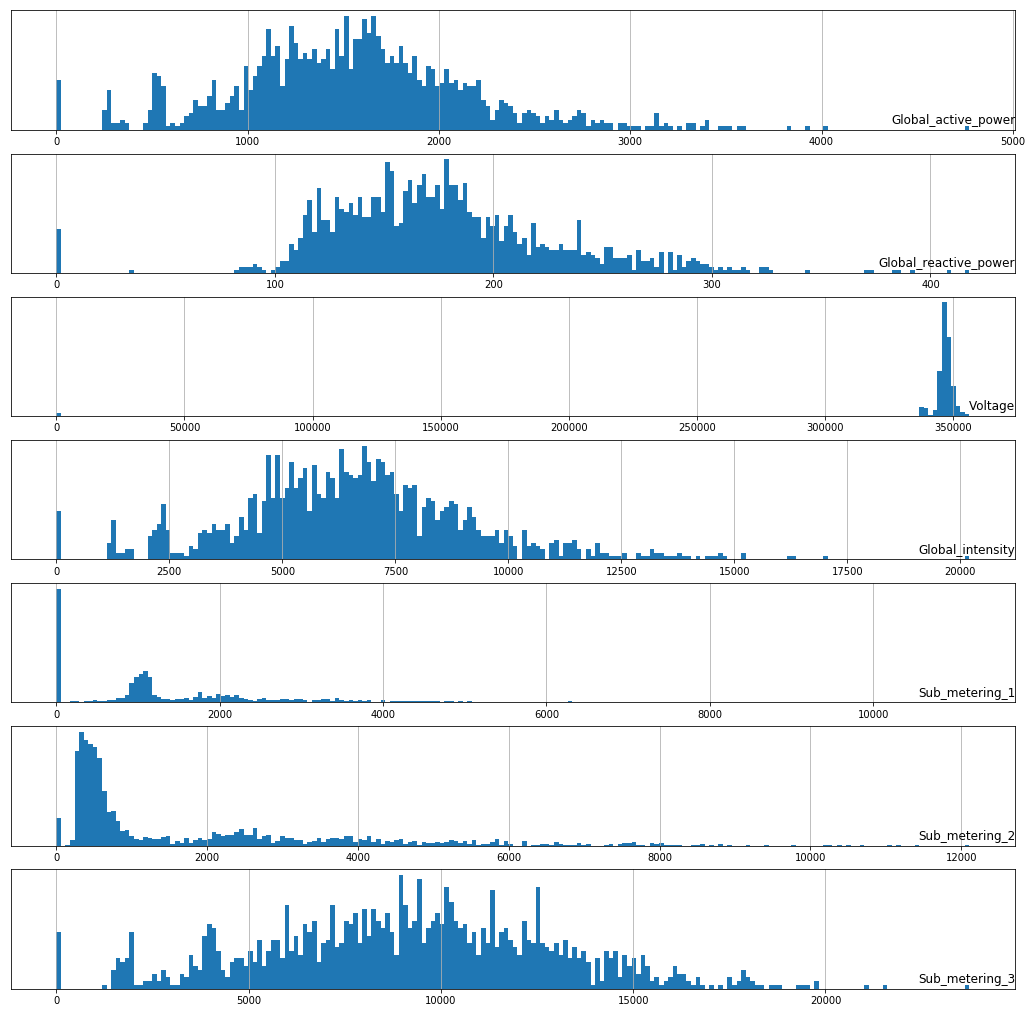

In [12]:
# for full data

fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    data[name].hist(bins=200)
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

## What can we predict

Forecast hourly consumption for the next day.  
Forecast daily consumption for the next week.  
Forecast daily consumption for the next month.    
Forecast monthly consumption for the next year.  

## Modeling Methods  
There are many modeling methods and few of those are as follows

Naive Methods -> Naive methods would include methods that make very simple, but often very effective assumptions.  
Classical Linear Methods -> Classical linear methods include techniques are very effective for univariate time series forecasting  
Machine Learning Methods -> Machine learning methods require that the problem be framed as a supervised learning problem.  
k-nearest neighbors.  
SVM  
Decision trees  
Random forest  
Gradient boosting machines  
Deep Learning Methods -> combinations of CNN LSTM and ConvLSTM, have proven effective on time series classification tasks  
CNN  
LSTM  
CNN - LSTM  

In [13]:
data_train = data.loc[:'2009-12-31', :]['Global_active_power']
data_train.head()

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Freq: D, Name: Global_active_power, dtype: float64

In [14]:
data_test = data['2010']['Global_active_power']
data_test.head()

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
Freq: D, Name: Global_active_power, dtype: float64

In [15]:
data_train.shape

(1112,)

In [16]:
data_test.shape

(345,)

# Prepare Training data

In [17]:
data_train = np.array(data_train)
print(data_train)

X_train, y_train = [], []
for i in range(7, len(data_train)-7):
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

[1209.176 3390.46  2203.826 ... 2047.968 2451.11  2211.892]


((1098, 7), (1098, 7))

In [18]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,1209.176,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338
1,3390.460,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386
2,2203.826,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012
3,1666.194,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120
4,2225.748,1723.288,2341.338,4773.386,2550.012,2743.120,3934.110


In [19]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [20]:
X_train = X_train.reshape(1098, 7, 1)

In [21]:
X_train.shape

(1098, 7, 1)

# Build LSTM Network

In [22]:
model = Sequential()
model.add(LSTM(units = 200, activation = 'relu', input_shape=(7,1)))
model.add(Dense(7))

model.compile(loss='mse', optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 7)                 1407      
Total params: 163,007
Trainable params: 163,007
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, epochs = 100)

Train on 1098 samples
Epoch 1/100
1098/1098 [==============================] - 2s 2ms/sample - loss: 0.0653
Epoch 2/100
1098/1098 [==============================] - 0s 287us/sample - loss: 0.0248
Epoch 3/100
1098/1098 [==============================] - 0s 280us/sample - loss: 0.0241
Epoch 4/100
1098/1098 [==============================] - 0s 285us/sample - loss: 0.0241
Epoch 5/100
1098/1098 [==============================] - 0s 413us/sample - loss: 0.0241
Epoch 6/100
1098/1098 [==============================] - 0s 361us/sample - loss: 0.0239
Epoch 7/100
1098/1098 [==============================] - 0s 318us/sample - loss: 0.0239
Epoch 8/100
1098/1098 [==============================] - 0s 318us/sample - loss: 0.0240
Epoch 9/100
1098/1098 [==============================] - 0s 289us/sample - loss: 0.0240
Epoch 10/100
1098/1098 [==============================] - 0s 305us/sample - loss: 0.0239
Epoch 11/100
1098/1098 [==============================] - 0s 276us/sample - loss: 0.0239
Epoch 12/1

# Prepare test dataset and test LSTM model

In [25]:
data_test = np.array(data_test)

In [26]:
X_test, y_test = [], []

for i in range(7, len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])

In [27]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [28]:

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [29]:
X_test = X_test.reshape(331,7,1)

In [30]:
X_test.shape

(331, 7, 1)

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[1457.3063 , 1466.2854 , 1561.3508 , ..., 1534.152  , 1582.3829 ,
        1563.2019 ],
       [1131.2228 , 1279.9927 , 1428.9402 , ..., 1486.2814 , 1545.6566 ,
        1493.2725 ],
       [1520.91   , 1497.4391 , 1582.9568 , ..., 1514.8816 , 1517.314  ,
        1514.9111 ],
       ...,
       [ 834.1187 ,  739.1721 ,  820.61957, ...,  632.0853 ,  515.79065,
         743.08673],
       [1554.679  , 1331.8735 , 1220.373  , ...,  925.96313,  796.5268 ,
         992.83844],
       [1587.9037 , 1373.5172 , 1280.5021 , ..., 1043.4554 , 1019.3142 ,
        1179.1565 ]], dtype=float32)

In [33]:
y_true = y_scaler.inverse_transform(y_test)
y_true

array([[ 555.664, 1593.318, 1504.82 , ...,    0.   , 1995.796, 2116.224],
       [1593.318, 1504.82 , 1383.18 , ..., 1995.796, 2116.224, 2196.76 ],
       [1504.82 , 1383.18 ,    0.   , ..., 2116.224, 2196.76 , 2150.112],
       ...,
       [1892.998, 1645.424, 1439.426, ..., 1973.382, 1109.574,  529.698],
       [1645.424, 1439.426, 2035.418, ..., 1109.574,  529.698, 1612.092],
       [1439.426, 2035.418, 1973.382, ...,  529.698, 1612.092, 1579.692]])

# Evaluate the Model

In [34]:

def evaluate_model(y_true, y_predicted):
    scores = []
    
    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    
    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score, scores

In [35]:
evaluate_model(y_true, y_pred)

(587.294726539395,
 [590.8090616389225,
  595.0845012716492,
  591.4449312671973,
  578.8051593529278,
  585.2548407421117,
  588.3958636039405,
  581.093210806116])